<a href="https://colab.research.google.com/github/Indhusaikar/My-QC/blob/main/Q_hands_on_practice_chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 13.2 MB/s eta 0:00:00


In [20]:
# Listing 3.1 Verify Qiskit version
import qiskit
qiskit.__qiskit_version__

AttributeError: module 'qiskit' has no attribute '__qiskit_version__'

In [10]:
# Listing 3.2: The first qubit
from qiskit import QuantumCircuit

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define initial_state as |1>
initial_state = [0,1]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0)

In [13]:
!pip install matplotlib

In [14]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.4 MB/s eta 0:00:00


In [21]:
# Listing 3.3: Prepare the simulation backend
from qiskit_aer import Aer

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# Do the simulation, returning the result
result = backend.run(qc).result()

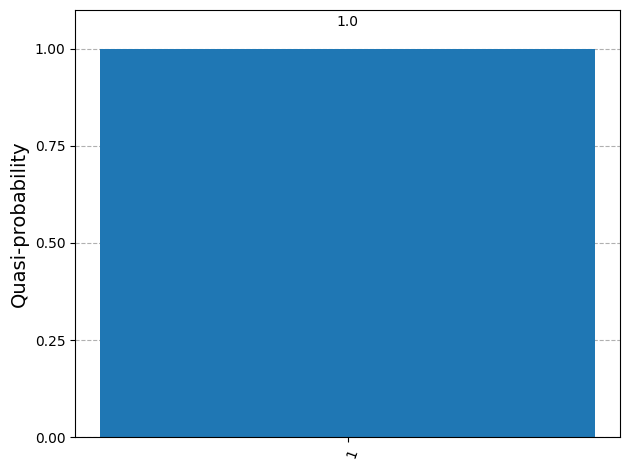

In [19]:
# Listing 3.4: The measured qubit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

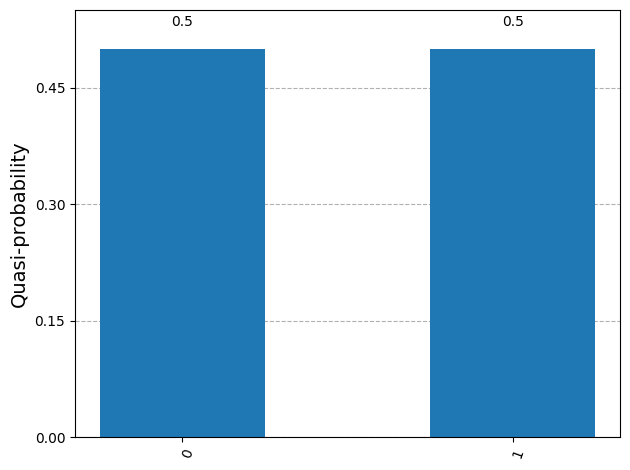

In [38]:
# Listing 3.5: First attempt to superpose two states
from math import sqrt
from qiskit_aer import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Define state |psi> - Normalized state
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# Get the statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# execute the qc
results = backend.run(qc).result().get_counts()

# plot the results
plot_histogram(results)

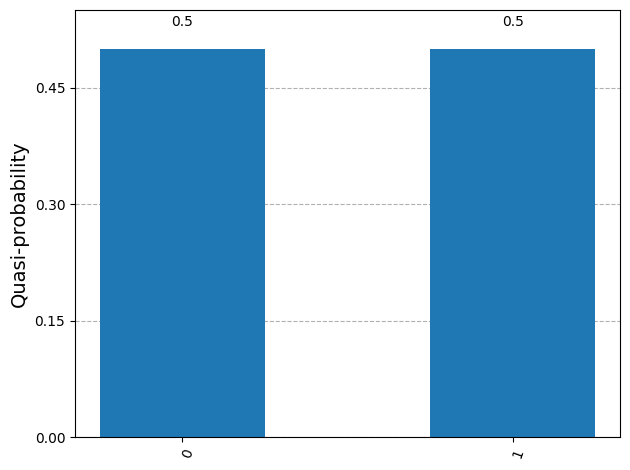

In [33]:
# Listing 3.6: Weighted initial state
from math import sqrt

# Define state |psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# execute the qc
results = execute(qc,backend).result().get_counts()

# plot the results
plot_histogram(results)


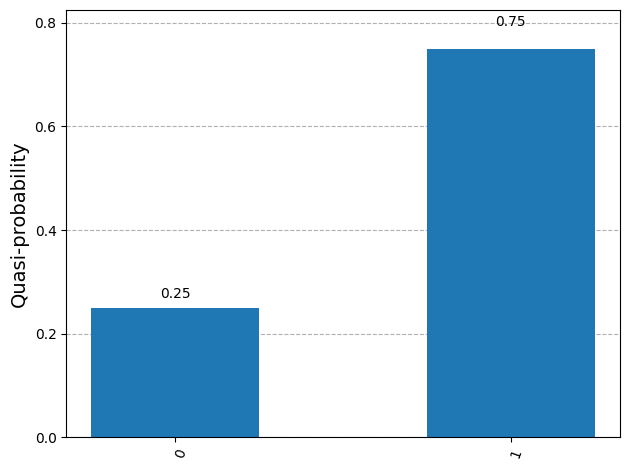

In [43]:
#Listing 3.7: The qubit with a probability of 0.25 to result in 0
from qiskit_aer import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from math import sqrt

qc = QuantumCircuit(1)
initial_state = [1/2, sqrt(3)/2] # Here, we insert the state
qc.initialize(initial_state, 0)
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

Bypassing The Normalization

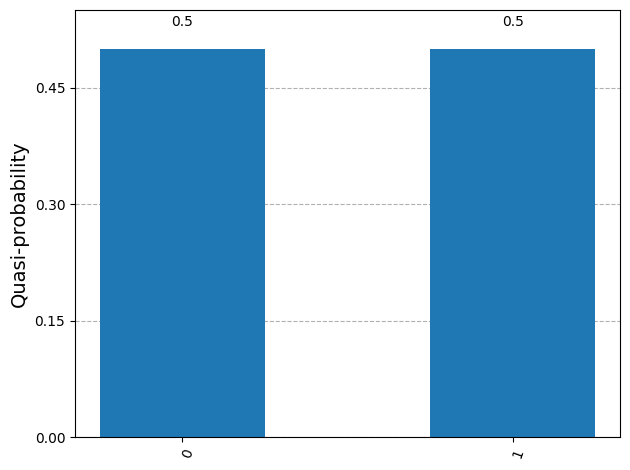

In [45]:
# Listing 3.8: Using theta to specify the quantum state vector
from math import pi, cos, sin
from qiskit_aer import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

def get_state (theta):
    """returns a valid state vector"""
    return [cos(theta/2), sin(theta/2)]

# play with the values for theta to get a feeling
theta = -pi/2 # affects the probabilities


# create, initialize, and execute the quantum circuit
qc = QuantumCircuit(1)
qc.initialize(get_state(theta), 0)
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result()
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

Exploring The Observer Effect

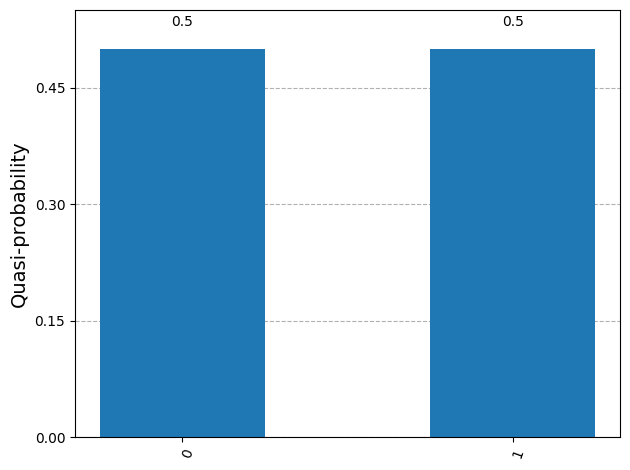

In [48]:
# Listing 3.9: A circuit without measurement
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from math import sqrt

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define state |Psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0)

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# Do the simulation, returning the result
result = execute(qc,backend).result()

# Get the data and display histogram
counts = result.get_counts()
plot_histogram(counts)

In [49]:
# Listing 3.10: Draw the circuit
qc.draw(output='text')

┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘

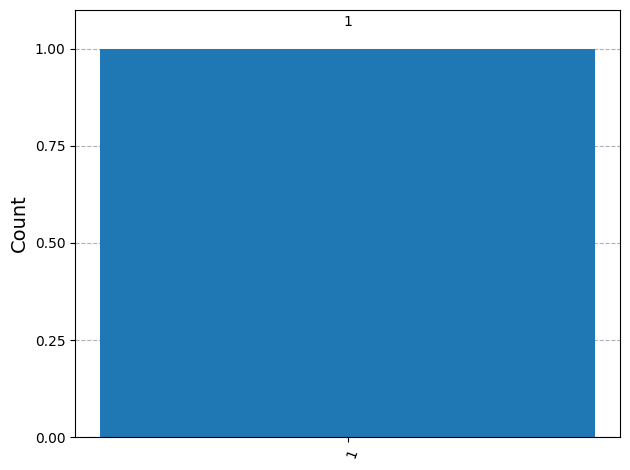

In [50]:
# Listing 3.11: Circuit with measurement
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)

# observe the qubit
qc.measure_all()

# Do the simulation, returning the result
result = backend.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

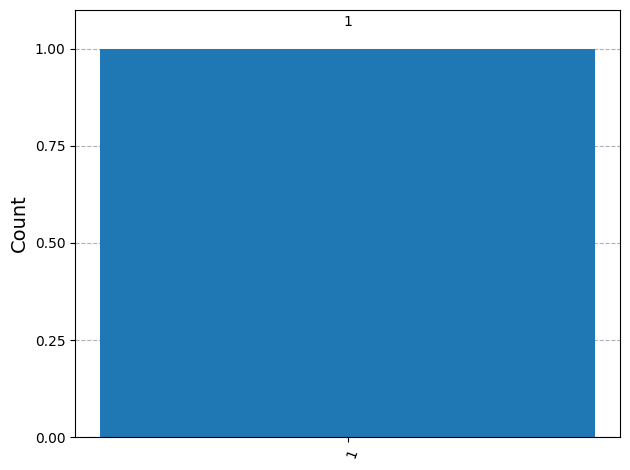

In [52]:
# Listing 3.12: Another circuit with measurement
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.measure_all()
result = backend.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

In [53]:
# Listing 3.13: Draw a circuit with measurement
qc.draw(output='text')

┌─────────────────────────────┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├─░─┤M├
        └─────────────────────────────┘ ░ └╥┘
meas: 1/═══════════════════════════════════╩═
                                           0

Parameterized Quantum Circuit

In [54]:
# Listing 3.14: A simple PQC binary classifier
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1/sqrt(2)]
qc.initialize(initial_state, 0)
qc.measure_all()

In [63]:
# Listing 3.15: The parameterized quantum circuit classifier
from qiskit_aer import  Aer
from qiskit import QuantumCircuit
from math import sqrt
from sklearn.metrics import recall_score, precision_score, confusion_matrix

def pqc_classify(backend, passenger_state):
    """backend -- a qiskit backend to run the quantum circuit at
    passenger_state -- a valid quantum state vector"""

    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)

    # Define state |Psi> and initialize the circuit
    qc.initialize(passenger_state, 0)

    # Measure the qubit
    qc.measure_all()

    # run the quantum circuit
    result=backend.run(qc).result()

    # get the counts, these are either {'0': 1} or {'1': 1}
    counts=result.get_counts(qc)

    # get the bit 0 or 1
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [57]:
# Listing 3.16: Load the data
import numpy as np

with open('/content/drive/MyDrive/train.npy', 'rb') as f:
    train_input = np.load(f)
    train_labels = np.load(f)

with open('/content/drive/MyDrive/test.npy', 'rb') as f:
    test_input = np.load(f)
    test_labels = np.load(f)

In [58]:
# REDEFINE OR IMPORT THE FUNCTIONS OF CHAPTER 2
def run(f_classify, x):
    return list(map(f_classify, x))

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))
#CAPTION A reusable function to unmask the hypocrite classifier

In [64]:
# Listing 3.17: The scores of the random quantum classifier
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# Specify the quantum state that results in either 0 or 1
initial_state = [1/sqrt(2), 1/sqrt(2)]

classifier_report("Random PQC",
    run,
    lambda passenger: pqc_classify(backend, initial_state),
    train_input,
    train_labels)

The precision score of the Random PQC classifier is 0.36
The recall score of the Random PQC classifier is 0.44
The specificity score of the Random PQC classifier is 0.53
The npv score of the Random PQC classifier is 0.61
The information level is: 0.49


In [65]:
# Listing 3.18: Initialization of classical (pseudo‐)random
import random
random.seed(a=None, version=2)

 Variational Hybrid Quantum-Classical Algorithm

In [66]:
# Listing 3.19: Return statement of pqc-classify
def pqc_classify(backend, passenger_state):
    # ...

    # get the bit 0 or 1
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [67]:
# Listing 3.20: Pre‐processing template
def pre_process(passenger):
    """
    passenger -- the normalized (array of numeric data) passenger data
    returns a valid quantum state
    """
    quantum_state = [1/sqrt(2), 1/sqrt(2)]
    return quantum_state

In [71]:
# Listing 3.21: The parameterized quantum circuit
from qiskit_aer import Aer
from qiskit import QuantumCircuit

def pqc(backend, quantum_state):
    """
    backend -- a qiskit backend to run the quantum circuit at
    quantum_state -- a valid quantum state vector
    returns the counts of the measurement
    """

    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)

    # Define state |Psi> and initialize the circuit
    qc.initialize(quantum_state, 0)

    # Measure the qubit
    qc.measure_all()

    # run the quantum circuit
    result=backend.run(qc).result()

    # get the counts, these are either {'0': 1} or {'1': 1}
    counts=result.get_counts(qc)

    return counts

In [69]:
# Listing 3.22: Post‐processing
def post_process(counts):
    """
    counts -- the result of the quantum circuit execution
    returns the prediction
    """
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [72]:
# Listing 3.23: The scores of the random quantum classifier
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

classifier_report(
    "Variational",
    run,
    lambda passenger: post_process(pqc(backend, pre_process(passenger))),
    train_input,
    train_labels)

The precision score of the Variational classifier is 0.38
The recall score of the Variational classifier is 0.49
The specificity score of the Variational classifier is 0.51
The npv score of the Variational classifier is 0.63
The information level is: 0.50


In [73]:
# Listing 3.24: weigh a passenger's feature
def weigh_feature(feature, weight):
    """
    feature -- the single value of a passenger's feature
    weight -- the overall weight of this feature
    returns the weighted feature
    """
    return feature*weight

In [74]:
# Listing 3.25: Calculate the overall probability
from functools import reduce

def get_overall_probability(features, weights):
    """
    features -- list of the features of a passenger
    weights -- list of all features' weights
    """
    return reduce(
        lambda result, data: result + weigh_feature(*data),
        zip(features, weights),
        0
    )

In [75]:
# Listing 3.26: Calculate the correlation coefficients
from scipy.stats import spearmanr

# separate the training data into a list of the columns
columns = [list(map(lambda passenger: passenger[i], train_input)) for i in range(0,7)]

# calculate the correlation coefficient for each column
correlations = list(map(lambda col: spearmanr(col, train_labels)[0], columns))
correlations

[np.float64(-0.3199865971328056),
 np.float64(-0.509502431337675),
 np.float64(-0.03330984969276768),
 np.float64(0.08830880238697662),
 np.float64(0.13682508666206933),
 np.float64(0.3023305198766798),
 np.float64(-0.13624682982687314)]

In [76]:
# Listing 3.27: The weighting pre‐processing
from math import pi, sin, cos

def get_state (theta):
    """returns a valid state vector from angle theta"""
    return [cos(theta/2), sin(theta/2)]

def pre_process_weighted(passenger):
    """
    passenger -- the normalized (array of numeric data) passenger data
    returns a valid quantum state
    """

    # caluclate the overall probability
    mu = get_overall_probability(passenger, correlations)

    # theta between 0 (|0>) and pi (|1>)
    quantum_state = get_state((1-mu)*pi)

    return quantum_state

In [77]:
# Listing 3.28: Run the PQC with the weighted pre‐processing
backend = Aer.get_backend('statevector_simulator')

classifier_report("Variational",
    run,
    lambda passenger: post_process(pqc(backend, pre_process_weighted(passenger))),
    train_input,
    train_labels)


The precision score of the Variational classifier is 0.68
The recall score of the Variational classifier is 0.60
The specificity score of the Variational classifier is 0.83
The npv score of the Variational classifier is 0.78
The information level is: 0.72


In [78]:
# Listing 3.29: Test the PQC‐based classifier on data it has not seen before
classifier_report("Variational-Test",
    run,
    lambda passenger: post_process(pqc(backend, pre_process_weighted(passenger))),
    test_input,
    test_labels)

The precision score of the Variational-Test classifier is 0.70
The recall score of the Variational-Test classifier is 0.75
The specificity score of the Variational-Test classifier is 0.77
The npv score of the Variational-Test classifier is 0.82
The information level is: 0.76
